In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Normal Thompson Sampling

In [2]:
mean1 = 0
mean2 = np.arange(0,1,0.05)
mean_dict = {
    'm1':[[0,1], [0,1]],
    'm2':[[0,1], [1/2,1]],
    'm3':[[1/2,1], [0,1]],
    'm4':[[0,0.1], [1/2,0.1]],
    'm5':[[1/2,0.1], [0,0.1]]
}

In [3]:
def n_thompson(priors, means, n):
    regret = []
    for i in range(100):
        arm1_reward = []
        arm2_reward = []
        
        post1 = priors[0].copy()
        post2 = priors[1].copy()
        for j in range(n):
            arm1 = np.random.normal(post1[0], np.sqrt(post1[1]))
            arm2 = np.random.normal(post2[0], np.sqrt(post2[1]))
            
            if arm1 > arm2:
                reward = np.random.normal(means[0], 1)
                arm1_reward.append(reward)
                post1[0] = (post1[0]/post1[1] + np.mean(arm1_reward)/1**2) / (1/post1[1] + 1/1**2)       
                post1[1] = (1 + 1/(post1[1]))**(-1)
            else:
                reward = np.random.normal(means[1], 1)
                arm2_reward.append(reward)
                post2[0] = (post2[0]/post2[1] + np.mean(arm2_reward)/1**2) / (1/post2[1] + 1/1**2)
                post2[1] = (1 + 1/(post2[1]))**(-1)
            
            
        regret.append(max(means)*n - (len(arm1_reward)*means[0] + (len(arm2_reward)*means[1])))
    return [np.mean(regret), np.var(regret)]

In [4]:
n_results = {}
for key,value in mean_dict.items():
    ndiff = []
    nregret = []
    nvariance = []
    for each in mean2:
        ndiff.append(each - mean1)
        mean, var = n_thompson(value.copy(), [mean1, each], 1000)
        nregret.append(mean)
        nvariance.append(var)
        
    nout = pd.DataFrame()
    nout['μ2-μ1'] = ndiff
    nout['regret'] = nregret
    nout['variance'] = nvariance
    n_results[key+'- '+str(value)] = nout

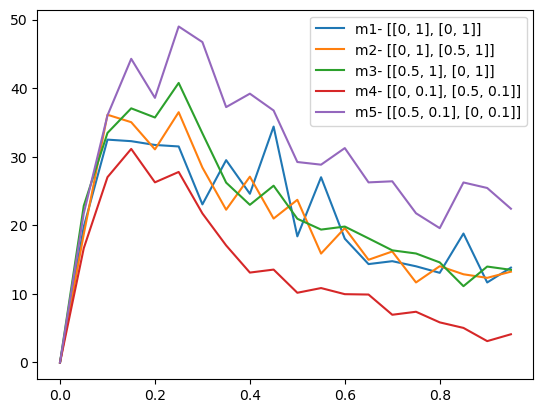

In [5]:
for key,value in n_results.items():
    plt.plot(value['μ2-μ1'], value['regret'], label=key)
plt.legend()

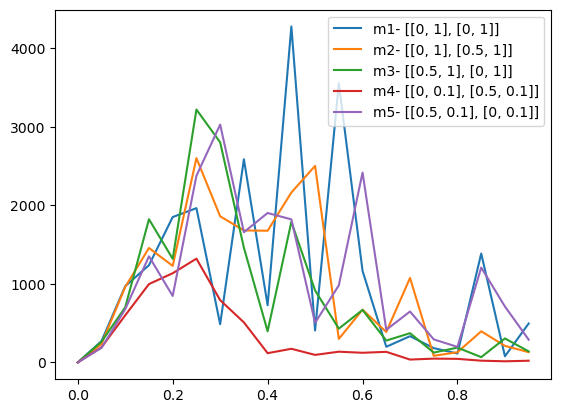

In [6]:
for key,value in n_results.items():
    plt.plot(value['μ2-μ1'], value['variance'], label=key)
plt.legend()

# Bernoulli Thompson Sampling

In [27]:
prob1 = 0.5
prob2 = np.arange(0,1,0.05)

beta_dict = {
    'b1':[[1,1], [1,1]],
    'b2':[[1,1], [1,3]],
    'b3':[[10,10], [10,10]],
    'b4':[[10,10], [10,30]]
}

In [28]:
def b_thompson(priors, prob, n):
    regret = []
    for i in range(100):
        arm1_reward = []
        arm2_reward = []
        
        arm1_pull = [0,0]
        arm2_pull = [0,0]
        
        post1 = priors[0].copy()
        post2 = priors[1].copy()
        for j in range(n):
            arm1 = np.random.beta(post1[0], post1[1])
            arm2 = np.random.beta(post2[0], post2[1])
            
            if arm1 > arm2:
                reward = np.random.choice([0,1], p=[1-prob[0], prob[0]])
                if reward == 1:
                    arm1_pull[0] += 1
                else:
                    arm1_pull[1] += 1
                arm1_reward.append(reward)
                post1[0] = post1[0] + arm1_pull[0] 
                post1[1] = post1[1] + arm1_pull[1]
            else:
                reward = np.random.choice([0,1], p=[1-prob[1], prob[1]])
                if reward == 1:
                    arm2_pull[0] += 1
                else:
                    arm2_pull[1] += 1
                arm2_reward.append(reward)
                post2[0] = post2[0] + arm2_pull[0] 
                post2[1] = post2[1] + arm2_pull[1]
            
            
        regret.append(max(prob)*n - (len(arm1_reward)*prob[0] + (len(arm2_reward)*prob[1])))
    return [np.mean(regret), np.var(regret)]

In [29]:
b_results = {}
for key,value in beta_dict.items():
    bdiff = []
    bregret = []
    bvariance = []
    for each in prob2:
        bdiff.append(each - prob1)
        mean, var = b_thompson(value.copy(), [prob1, each], 1000)
        bregret.append(mean)
        bvariance.append(var)
        
    bout = pd.DataFrame()
    bout['μ2-μ1'] = bdiff
    bout['regret'] = bregret
    bout['variance'] = bvariance
    b_results[key+'- '+str(value)] = bout

##### Regret Graph

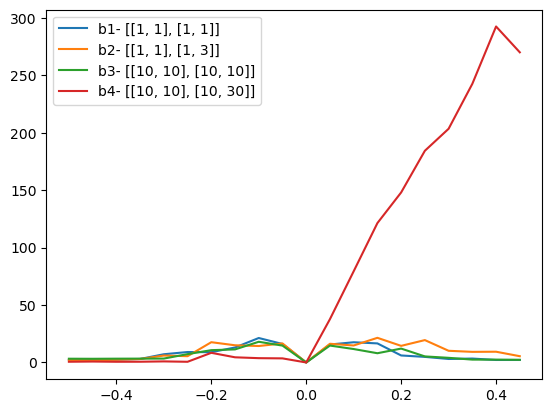

In [30]:
for key,value in b_results.items():
    plt.plot(value['μ2-μ1'], value['regret'], label=key)
plt.legend()

##### Variance Graph

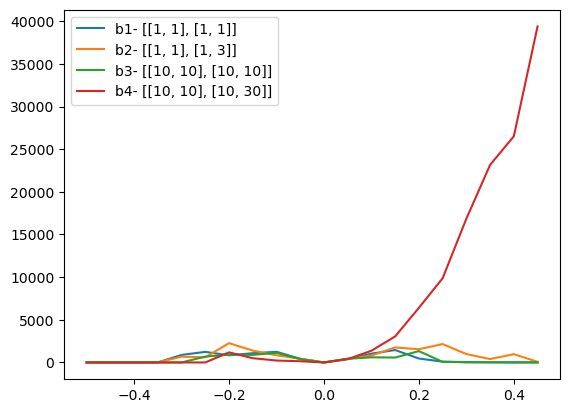

In [31]:
for key,value in b_results.items():
    plt.plot(value['μ2-μ1'], value['variance'], label=key)
plt.legend()